In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep= ';')


In [3]:
df_tree = pd.read_csv('bank-additional-full.csv', sep= ';')

## Summary of data

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Making new y_1: 1= yes and 0= no
df.loc[df['y']== 'no', 'y_1']= 0
df.loc[df['y']== 'yes', 'y_1']= 1

In [6]:
df.shape

(41188, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_1'],
      dtype='object')

In [9]:
df.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_1
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no,NaN
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN,0.112654
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN,0.316173
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN,0.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN,0.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN,0.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN,0.000000


## Age variable

In [10]:
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

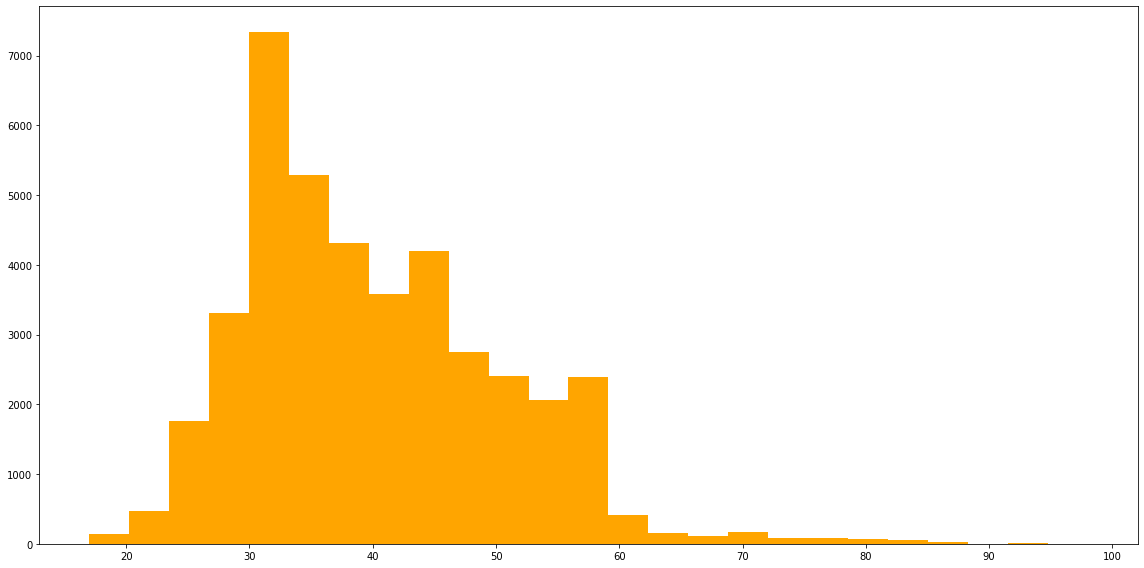

In [11]:
plt.figure(figsize= (16, 8))
plt.hist(df['age'], bins= 25, color= 'orange')
plt.tight_layout()

In [12]:
df['age'].quantile([.25, .5, .75])

0.25    32.0
0.50    38.0
0.75    47.0
Name: age, dtype: float64

In [13]:
df.loc[df['age'] < 32, 'age'] = 25
df.loc[(df['age'] >= 32)&(df.age <= 47),'age'] = 40
df.loc[df['age'] > 47,'age'] = 72
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_1
0,72,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
1,72,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
2,40,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
4,72,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0


In [20]:
df['age'].value_counts()

-0.090910    21985
 0.589942     9873
-0.410058     9330
Name: age, dtype: int64

In [21]:
age_agg= df.groupby('age').aggregate([np.mean])
age_agg

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_1
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
age,,,,,,,,,,
-0.410058,262.554555,2.527438,949.310932,0.203323,-0.126270,93.542677,-41.032787,3.353110,5156.595831,0.144051
-0.090910,256.631749,2.569070,974.207005,0.149875,0.169006,93.589842,-40.650243,3.723185,5172.238531,0.089834
0.589942,257.931733,2.602249,948.792363,0.195685,0.084594,93.575266,-39.672805,3.647827,5165.316712,0.133799


In [22]:
age_agg["y_1", "mean"]

age
-0.410058    0.144051
-0.090910    0.089834
 0.589942    0.133799
Name: (y_1, mean), dtype: float64

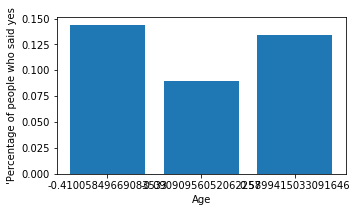

In [23]:
plt.figure(figsize= (5, 3))
plt.bar(range(len(age_agg)), age_agg["y_1", "mean"])
plt.xticks(range(len(age_agg)), age_agg["y_1", "mean"].index)
plt.xlabel('Age')
plt.ylabel("'Percentage of people who said yes")
plt.tight_layout()

In [24]:
df['age']= (df['age']-df['age'].mean())/(df['age'].max()-df['age'].min())

## Duration variable
### : last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Job variable
### type of job 

In [25]:
job_vc= df['job'].value_counts()
job_vc

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

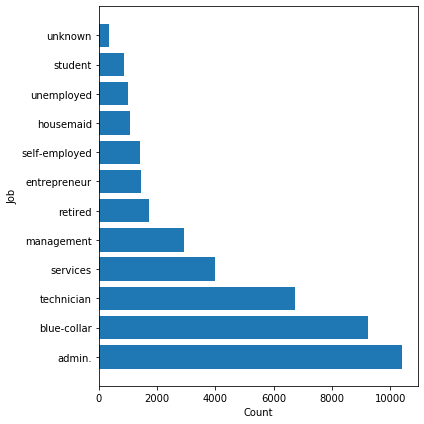

In [26]:
plt.figure(figsize= (6, 6))
plt.barh(range(len(job_vc)), job_vc)
plt.yticks(range(len(job_vc)), job_vc.index)
plt.xlabel('Count')
plt.ylabel('Job')
plt.tight_layout()

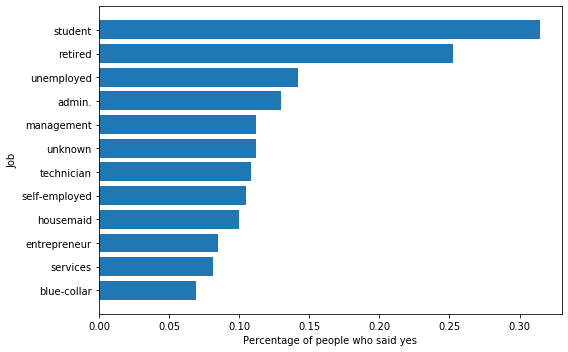

In [27]:
job_agg= df.groupby('job').aggregate([np.mean])
job_agg

sorted_job_agg= job_agg["y_1", "mean"].values.argsort()

plt.figure(figsize= (8, 5))
plt.barh(range(len(job_agg)), job_agg["y_1", "mean"][sorted_job_agg])
plt.yticks(range(len(job_agg)), job_agg["y_1", "mean"].index[sorted_job_agg])
plt.ylabel('Job')
plt.xlabel("Percentage of people who said yes")
plt.tight_layout()

In [28]:
dummy_job= pd.get_dummies(df['job'], drop_first=True)

In [29]:
dummy_job.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [30]:
df= pd.concat([df, dummy_job], axis=1)

In [31]:
dummy_job_tree= pd.get_dummies(df_tree['job'], drop_first=True)

In [32]:
df_tree= pd.concat([df_tree, dummy_job_tree], axis=1)

In [33]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0.589942,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,0.589942,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,-0.090910,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,-0.090910,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,0.589942,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


In [34]:
df.shape

(41188, 33)

## Martial variable
###  marital status 

In [35]:
marital_vc= df['marital'].value_counts()
marital_vc

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

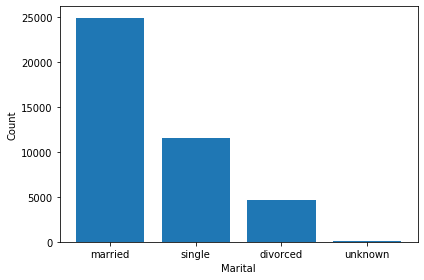

In [36]:
plt.figure(figsize= (6, 4))
plt.bar(range(len(marital_vc)), marital_vc)
plt.xticks(range(len(marital_vc)), marital_vc.index)
plt.ylabel('Count')
plt.xlabel('Marital')
plt.tight_layout()

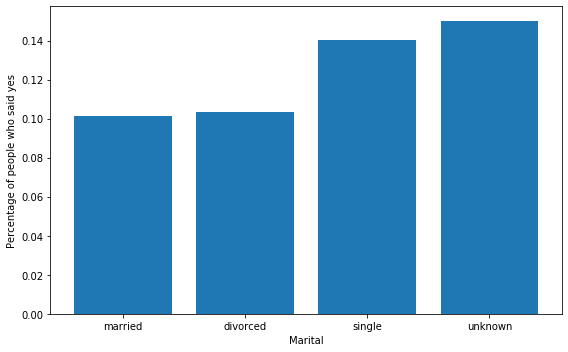

In [37]:
marital_agg= df.groupby('marital').aggregate([np.mean])
marital_agg

sorted_marital_agg= marital_agg["y_1", "mean"].values.argsort()

plt.figure(figsize= (8, 5))
plt.bar(range(len(marital_agg)), marital_agg["y_1", "mean"][sorted_marital_agg])
plt.xticks(range(len(marital_agg)), marital_agg["y_1", "mean"].index[sorted_marital_agg])
plt.xlabel('Marital')
plt.ylabel("Percentage of people who said yes")
plt.tight_layout()

### According to that unknown martial is rare and it behave like single we can put them in one variable together for dimensional reduction

In [38]:
df[df['marital']== 'unknown'].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
40,0.589942,management,unknown,university.degree,no,yes,no,telephone,may,mon,...,0,0,1,0,0,0,0,0,0,0
390,0.589942,retired,unknown,university.degree,unknown,no,no,telephone,may,tue,...,0,0,0,1,0,0,0,0,0,0
413,0.589942,retired,unknown,basic.4y,no,no,no,telephone,may,tue,...,0,0,0,1,0,0,0,0,0,0
1493,-0.090910,services,unknown,high.school,no,yes,yes,telephone,may,thu,...,0,0,0,0,0,1,0,0,0,0
1608,-0.090910,unknown,unknown,university.degree,no,no,no,telephone,may,fri,...,0,0,0,0,0,0,0,0,0,1


In [39]:
df[df['marital']== 'unknown'].shape

(80, 33)

In [40]:
df.loc[df['marital'] == 'unknown','marital'] = 'single'

In [41]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [42]:
marital_dummy= pd.get_dummies(df['marital'], drop_first=True)

In [43]:
marital_dummy.head()

,married,single
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [44]:
df= pd.concat([df, marital_dummy], axis=1)

In [45]:
df_tree= pd.concat([df_tree, marital_dummy], axis=1)

In [46]:
#32+ 3= 35
df.shape

(41188, 35)

In [47]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single
0,0.589942,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,1,0
1,0.589942,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
2,-0.090910,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
3,-0.090910,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,1,0
4,0.589942,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0


## Education variable

In [48]:
edu_vc= df['education'].value_counts()
edu_vc

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

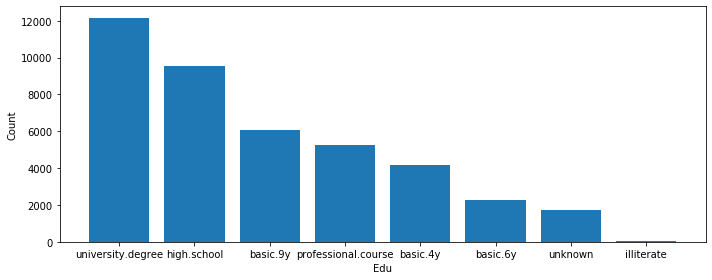

In [49]:
plt.figure(figsize= (10, 4))
plt.bar(range(len(edu_vc)), edu_vc)
plt.xticks(range(len(edu_vc)), edu_vc.index)
plt.ylabel('Count')
plt.xlabel('Edu')
plt.tight_layout()

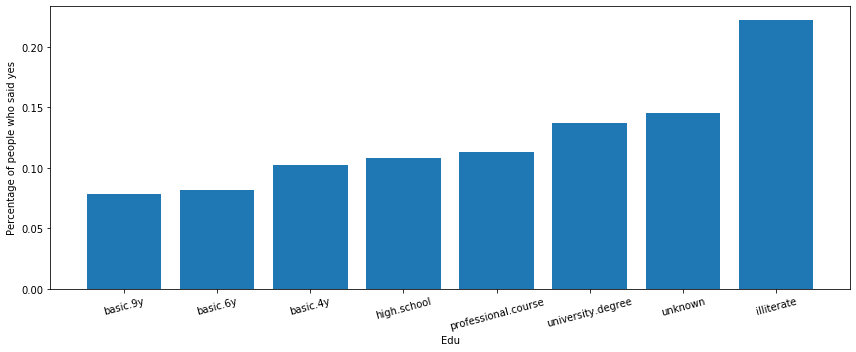

In [50]:
edu_agg= df.groupby('education').aggregate([np.mean])
edu_agg

sorted_edu_agg= edu_agg["y_1", "mean"].values.argsort()

plt.figure(figsize= (12, 5))
plt.bar(range(len(edu_agg)), edu_agg["y_1", "mean"][sorted_edu_agg])
plt.xticks(range(len(edu_agg)), edu_agg["y_1", "mean"].index[sorted_edu_agg], rotation= 15)
plt.xlabel('Edu')
plt.ylabel("Percentage of people who said yes")
plt.tight_layout()

In [51]:
df.loc[df['education'] == 'unknown', 'education'] = 'education_unknown'

In [52]:
dummy_edu= pd.get_dummies(df['education'], drop_first=True)

In [53]:
df= pd.concat([df, dummy_edu], axis=1)

In [54]:
dummy_edu_tree= pd.get_dummies(df_tree['education'], drop_first=True)

In [55]:
df_tree= pd.concat([df_tree, dummy_edu], axis=1)
#df_tree= pd.concat([df_tree, dummy_edu_tree], axis=1)

## Default variable
### has credit in default?

In [56]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [57]:
default_vc= df['default'].value_counts()
default_vc

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

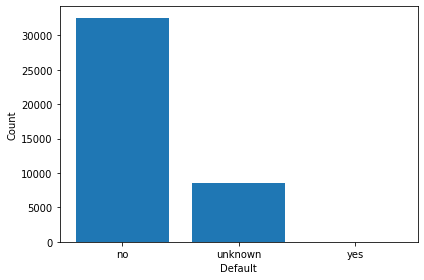

In [58]:
plt.figure(figsize= (6, 4))
plt.bar(range(len(default_vc)), default_vc)
plt.xticks(range(len(default_vc)), default_vc.index)
plt.ylabel('Count')
plt.xlabel('Default')
plt.tight_layout()

### Because yes in default  variable is very rare We combine it with unknown for dimension reduction and avoiding overfiting

In [59]:
df.loc[df['default'] == 'unknown', 'default'] = 'unknown-yes'
df.loc[(df['default'] == 'yes'), 'default'] = 'unknown-yes'
df.loc[(df['default'] == 'no'), 'default'] = 'default-no'

In [60]:
dummy_default= pd.get_dummies(df['default'], drop_first=True)

In [61]:
df= pd.concat([df, dummy_default], axis=1)

In [62]:
dummy_default_tree= pd.get_dummies(df_tree['default'], drop_first=True)

In [63]:
df_tree= pd.concat([df_tree, dummy_default_tree], axis=1)

## Housing variable
### has housing loan? 

In [64]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [65]:
housing_agg= df.groupby('housing').aggregate([np.mean])
housing_agg

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,married,single,basic.6y,basic.9y,education_unknown,high.school,illiterate,professional.course,university.degree,unknown-yes
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
housing,,,,,,,,,,,,,,,,,,,,,
no,-0.001119,260.663677,2.601010,964.559875,0.161153,0.184089,93.624836,-40.337590,3.732474,5170.661857,...,0.611588,0.276071,0.057459,0.147299,0.043819,0.234293,0.000430,0.122436,0.289281,0.215229
unknown,-0.000258,250.194949,2.560606,964.896970,0.184848,0.113434,93.636011,-40.289192,3.653046,5166.457273,...,0.593939,0.283838,0.060606,0.152525,0.040404,0.222222,0.000000,0.126263,0.279798,0.229293
yes,0.000977,256.603217,2.539071,960.565304,0.182610,-0.007773,93.530456,-40.654811,3.523873,5163.932949,...,0.600250,0.288561,0.053856,0.146042,0.040554,0.228587,0.000463,0.131535,0.301446,0.202308


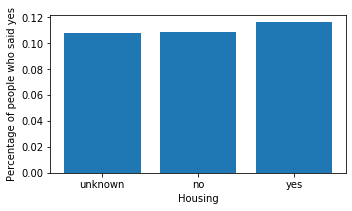

In [66]:
sorted_housing_agg= housing_agg["y_1", "mean"].values.argsort()

plt.figure(figsize= (5, 3))
plt.bar(range(len(housing_agg)), housing_agg["y_1", "mean"][sorted_housing_agg])
plt.xticks(range(len(housing_agg)), housing_agg["y_1", "mean"].index[sorted_housing_agg])
plt.xlabel('Housing')
plt.ylabel("Percentage of people who said yes")
plt.tight_layout()

### It seems that this feature is not so much usable
### So maybe later we drope it

## Loan variable
### has personal loan?

In [67]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

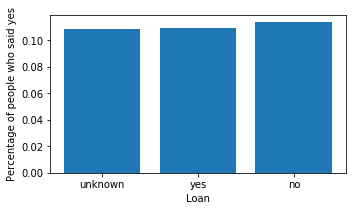

In [68]:
loan_agg= df.groupby('loan').aggregate([np.mean])

sorted_loan_agg= loan_agg["y_1", "mean"].values.argsort()

plt.figure(figsize= (5, 3))
plt.bar(range(len(loan_agg)), loan_agg["y_1", "mean"][sorted_loan_agg])
plt.xticks(range(len(loan_agg)), loan_agg["y_1", "mean"].index[sorted_loan_agg])
plt.xlabel('Loan')
plt.ylabel("Percentage of people who said yes")
plt.tight_layout()

### it seems that loan is not a good predictor neither
### So maybe later we drope it

## contact variable
### contact communication type 

In [69]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

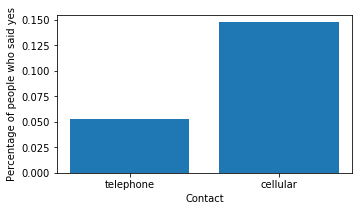

In [70]:
contact_agg= df.groupby('contact').aggregate([np.mean])

sorted_contact_agg= contact_agg["y_1", "mean"].values.argsort()

plt.figure(figsize= (5, 3))
plt.bar(range(len(contact_agg)), contact_agg["y_1", "mean"][sorted_contact_agg])
plt.xticks(range(len(contact_agg)), contact_agg["y_1", "mean"].index[sorted_contact_agg])
plt.xlabel('Contact')
plt.ylabel("Percentage of people who said yes")
plt.tight_layout()

### contact shuld be a very effective variable

In [71]:
dummy_contact = pd.get_dummies(df['contact'], drop_first=True)

In [72]:
df= pd.concat([df, dummy_contact], axis=1)

In [73]:
df_tree= pd.concat([df_tree, dummy_contact], axis=1)

## Month variable
### last contact month of year 

In [74]:
month_vc= df['month'].value_counts()
month_vc

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

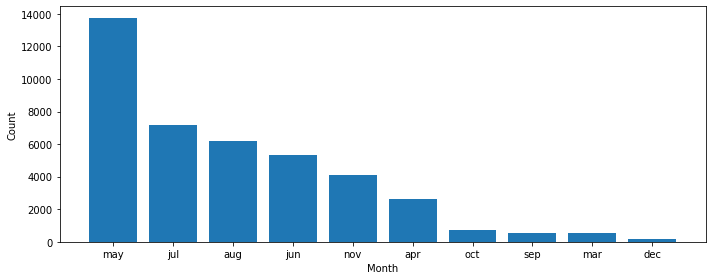

In [75]:
plt.figure(figsize= (10, 4))
plt.bar(range(len(month_vc)), month_vc)
plt.xticks(range(len(month_vc)), month_vc.index)
plt.ylabel('Count')
plt.xlabel('Month')
plt.tight_layout()

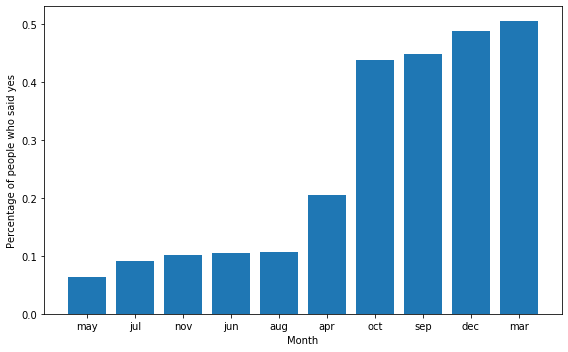

In [76]:
month_agg= df.groupby('month').aggregate([np.mean])

sorted_month_agg= month_agg["y_1", "mean"].values.argsort()

plt.figure(figsize= (8, 5))
plt.bar(range(len(month_agg)), month_agg["y_1", "mean"][sorted_month_agg])
plt.xticks(range(len(month_agg)), month_agg["y_1", "mean"].index[sorted_month_agg])
plt.xlabel('Month')
plt.ylabel("Percentage of people who said yes")
plt.tight_layout()

### It seem months which has less frequently had a better chance too say yes to camapaign

In [77]:
dummy_month= pd.get_dummies(df['month'], drop_first=True)

In [78]:
df= pd.concat([df, dummy_month], axis=1)

In [79]:
df_tree= pd.concat([df_tree, dummy_month], axis=1)

## Day_of_week
### last contact day of the week 

In [80]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

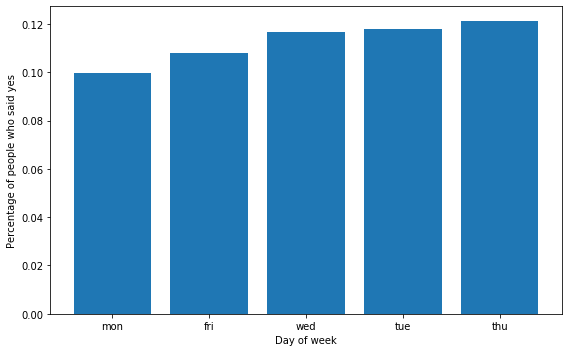

In [81]:
day_agg= df.groupby('day_of_week').aggregate([np.mean])

sorted_day_agg= day_agg["y_1", "mean"].values.argsort()

plt.figure(figsize= (8, 5))
plt.bar(range(len(day_agg)), day_agg["y_1", "mean"][sorted_day_agg])
plt.xticks(range(len(day_agg)), day_agg["y_1", "mean"].index[sorted_day_agg])
plt.xlabel('Day of week')
plt.ylabel("Percentage of people who said yes")
plt.tight_layout()

### it seems tha loan is not a good predictor
### So maybe later we drope it

## Campaign variable
### number of contacts performed during this campaign and for this client (numeric, includes last contact)

In [82]:
np.sort(df['campaign'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 37, 39, 40, 41, 42, 43, 56], dtype=int64)

(0, 7)

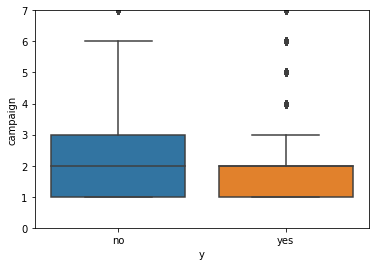

In [83]:
sns.boxplot(df['y'], df['campaign'])
plt.ylim(0, 7)

In [84]:
df['campaign']= (df['campaign']-df['campaign'].mean())/(df['campaign'].max()-df['campaign'].min())

### opposite of what we think people who did not said yes to campeign had been in more campeingns before

## Pdays variable
### number of days that passed by after the client was last contacted from a previous campaign 

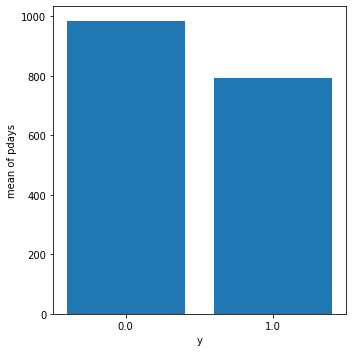

In [85]:
pday_agg= df.groupby('y_1').aggregate([np.mean])

plt.figure(figsize= (5, 5))
plt.bar(range(len(pday_agg)), pday_agg["pdays", "mean"])
plt.xticks(range(len(pday_agg)), pday_agg["pdays", "mean"].index)
plt.xlabel('y')
plt.ylabel("mean of pdays")
plt.tight_layout()

### mean of pdays of people who said yes is less

In [86]:
df['pdays']= (df['pdays']-df['pdays'].mean())/(df['pdays'].max()-df['pdays'].min())

## previous variable
### number of contacts performed before this campaign and for this client 

In [87]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [88]:
df.loc[df['previous']== 4, 'previous'] = 4.5
df.loc[df['previous'] == 5, 'previous'] = 4.5
df.loc[df['previous'] == 6, 'previous'] = 4.5
df.loc[df['previous'] == 7, 'previous'] = 4.5

In [89]:
df['previous']= (df['previous']-df['previous'].mean())/(df['previous'].max()-df['previous'].min())

## 	Poutcome variable
### outcome of the previous marketing campaign 

In [90]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

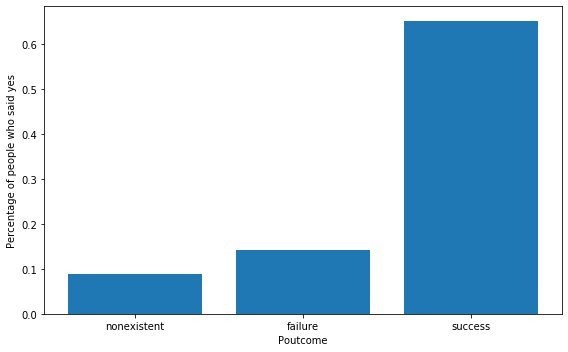

In [91]:
poutcome_agg= df.groupby('poutcome').aggregate([np.mean])

sorted_poutcome_agg= poutcome_agg["y_1", "mean"].values.argsort()

plt.figure(figsize= (8, 5))
plt.bar(range(len(poutcome_agg)), poutcome_agg["y_1", "mean"][sorted_poutcome_agg])
plt.xticks(range(len(poutcome_agg)), poutcome_agg["y_1", "mean"].index[sorted_poutcome_agg])
plt.xlabel('Poutcome')
plt.ylabel("Percentage of people who said yes")
plt.tight_layout()

### It should be a great predictor, 
### It is cool that probality of say yes too campeign for people who this campeign is their first campeign in this bank is less than people which their last camepign failed.

In [92]:
dummy_pout = pd.get_dummies(df['poutcome'], drop_first= True)

In [93]:
df= pd.concat([df, dummy_pout], axis=1)

In [94]:
dummy_pout_tree = pd.get_dummies(df_tree['poutcome'], drop_first= True)

In [95]:
df_tree= pd.concat([df_tree, dummy_pout_tree], axis=1)

## Emp.var.rate variable
### employment variation rate - quarterly indicator 

In [96]:
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

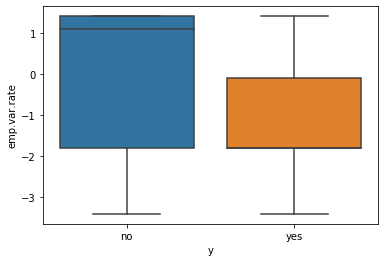

In [97]:
sns.boxplot(df['y'], df['emp.var.rate'])

### people who said yes to the campaign usually has less emp.var.rate

In [98]:
df['emp.var.rate']= (df['emp.var.rate']-df['emp.var.rate'].mean())/(df['emp.var.rate'].max()-df['emp.var.rate'].min())

## Cons.price.idx
### consumer price index - monthly indicator 

In [99]:
df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

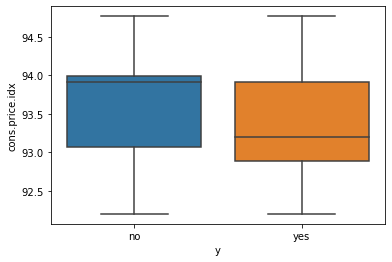

In [100]:
sns.boxplot(df['y'], df['cons.price.idx'])

### So here we can see that median in people who said yes is lower

In [101]:
df['cons.price.idx']= (df['cons.price.idx']-df['cons.price.idx'].mean())/(df['cons.price.idx'].max()-df['cons.price.idx'].min())

## Cons.conf.idx 
### consumer confidence index - monthly indicator (numeric)

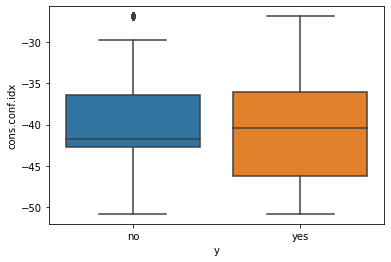

In [102]:
sns.boxplot(df['y'], df['cons.conf.idx'])

### So here we can see that median in people who said yes is upper

In [103]:
df['cons.conf.idx']= (df['cons.conf.idx']-df['cons.conf.idx'].mean())/(df['cons.conf.idx'].max()-df['cons.conf.idx'].min())

## Euribor3m
### euribor 3 month rate - daily indicator (numeric)

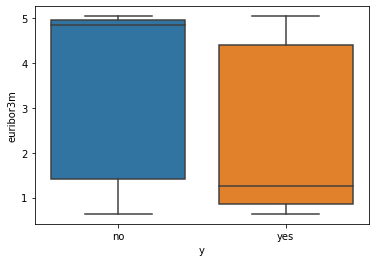

In [104]:
sns.boxplot(df['y'], df['euribor3m'])

### So here we can see that median in people who said yes is very lower so it should be a very good predictor

In [105]:
df['euribor3m']= (df['euribor3m']-df['euribor3m'].mean())/(df['euribor3m'].max()-df['euribor3m'].min())

## Nr.employed
### number of employees - quarterly indicator (numeric)

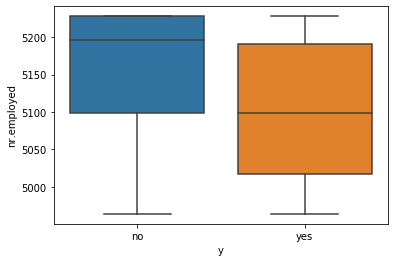

In [106]:
sns.boxplot(df['y'], df['nr.employed'])

In [107]:
df['nr.employed']= (df['nr.employed']-df['nr.employed'].mean())/(df['nr.employed'].max()-df['nr.employed'].min())

## Heat Map: Visualizing Correlation

In [108]:
df_numeric= df[['previous', 'pdays', 'nr.employed', 'euribor3m', 'emp.var.rate', 
    'cons.price.idx', 'cons.conf.idx', 'campaign', 'age']]

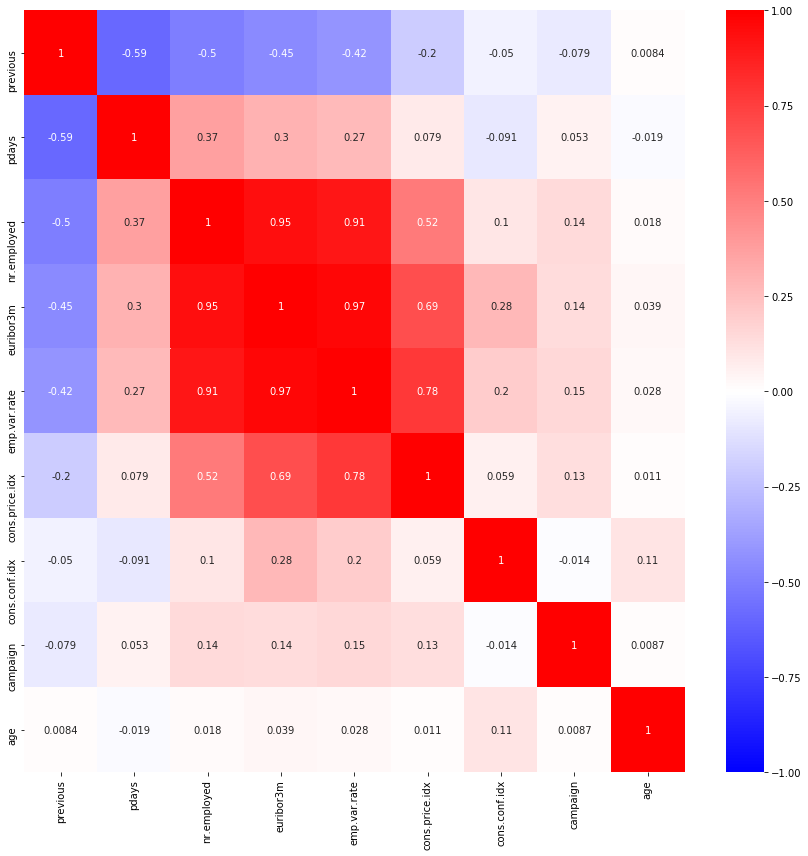

In [109]:
plt.figure(figsize= (12, 12))
sns.heatmap(df_numeric.corr(), annot = True, vmin=-1, vmax=1, center= 0, 
           cmap= 'bwr')
plt.tight_layout()

## Variables with high correlation are very bad and we should do some thing about them
## according to heat map 3 variables: Nr.employed, Euribor3m, Emp.var.rate two by two has more than .90 correlation 
### We can choose one of them and remove the rest, according to plots we choosed Nr.employed

# now we drop columns that seems useless or we made them dummy:


In [110]:
df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan','poutcome', 'contact', 'month',
                 'day_of_week', 'euribor3m', 'emp.var.rate', 'y_1'], inplace= True)


In [111]:
df_tree.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan','poutcome', 'contact', 'month',
                 'day_of_week'], inplace= True)

### We removed duration variable because: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [112]:
df.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y,blue-collar,...,dec,jul,jun,mar,may,nov,oct,sep,nonexistent,success
0,0.589942,261,-0.028502,0.036561,-0.038523,0.16303,0.171657,0.090601,no,0,...,0,0,0,0,1,0,0,0,1,0
1,0.589942,149,-0.028502,0.036561,-0.038523,0.16303,0.171657,0.090601,no,0,...,0,0,0,0,1,0,0,0,1,0
2,-0.090910,226,-0.028502,0.036561,-0.038523,0.16303,0.171657,0.090601,no,0,...,0,0,0,0,1,0,0,0,1,0
3,-0.090910,151,-0.028502,0.036561,-0.038523,0.16303,0.171657,0.090601,no,0,...,0,0,0,0,1,0,0,0,1,0
4,0.589942,307,-0.028502,0.036561,-0.038523,0.16303,0.171657,0.090601,no,0,...,0,0,0,0,1,0,0,0,1,0


# Y variable

In [113]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# Split data to train and test set

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
df_x = df.drop(columns= 'y')
df_y = df['y']

In [116]:
print(df_x.shape)
df_y.shape

(41188, 41)


(41188,)

In [117]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=0.1, random_state=42)

### It is accuracy when we consider all out comes as no it seem nice too us but here our Recall for 'yes' would be 0 that is too bad. and We know that predicting people who would say yes is more important

# Some predictive Models:

## 1: Logestic regression

In [119]:
df_log = pd.DataFrame.copy(df)
df_log['just.one'] = 1
df_log_x = df_log.drop(columns= 'y')
df_log_y = df_log['y']
from sklearn.model_selection import train_test_split
x_log_train, x_log_test, y_log_train, y_log_test= train_test_split(df_log_x, df_log_y, test_size=0.1, random_state=42)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [121]:
classifyer_logestic = LogisticRegression(solver='liblinear',
                                        multi_class='auto').fit(x_log_train, y_log_train)

In [122]:
classifyer_logestic.coef_


array([[-0.00935322,  0.00465187, -2.14225022, -0.90208022, -0.09822182,
        -0.59164339,  0.31646801, -3.52710918, -0.25492268, -0.11757917,
        -0.12965083, -0.03429803,  0.30463828, -0.22006743, -0.12637721,
         0.21975307,  0.01865955,  0.09320547,  0.04357074, -0.00645086,
         0.034335  ,  0.14467659, -0.01346841,  0.09470809, -0.01601479,
         0.56291772,  0.01240729,  0.13274606, -0.28980846, -0.34147702,
         0.16743518,  0.09197448,  0.31562841,  0.53821966,  1.2880364 ,
        -0.73860162, -0.27771461, -0.0114898 , -0.37551815,  0.46828084,
         0.97464802, -2.21069985]])

### these coef some how shows the importance of variables

### 1.1: train set accuracy

In [123]:
classifyer_logestic.score(x_log_train, y_log_train)

0.910437292616472

### 1.2: test set accuracy

In [124]:
classifyer_logestic.score(x_log_test, y_log_test)

0.9101723719349356

### 1.3: Confusion matrix and classification-report for training set

In [125]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_predict_log = classifyer_logestic.predict(x_log_train)
print(confusion_matrix(y_log_train, y_train_predict_log))

[[32030   861]
 [ 2459  1719]]


In [126]:
print(classification_report(y_log_train,y_train_predict_log))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     32891
         yes       0.67      0.41      0.51      4178

    accuracy                           0.91     37069
   macro avg       0.80      0.69      0.73     37069
weighted avg       0.90      0.91      0.90     37069



### 1.4: Confusion matrix and classification-report for test set

In [127]:
from sklearn.metrics import confusion_matrix
y_test_predict_log = classifyer_logestic.predict(x_log_test)
confusion_matrix(y_log_test, y_test_predict_log)

array([[3549,  108],
       [ 262,  200]], dtype=int64)

In [128]:
print(classification_report(y_log_test,y_test_predict_log))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      3657
         yes       0.65      0.43      0.52       462

    accuracy                           0.91      4119
   macro avg       0.79      0.70      0.73      4119
weighted avg       0.90      0.91      0.90      4119



## 2: Decision tree

# Split data to train and test set

In [129]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   duration             41188 non-null  int64  
 2   campaign             41188 non-null  int64  
 3   pdays                41188 non-null  int64  
 4   previous             41188 non-null  int64  
 5   emp.var.rate         41188 non-null  float64
 6   cons.price.idx       41188 non-null  float64
 7   cons.conf.idx        41188 non-null  float64
 8   euribor3m            41188 non-null  float64
 9   nr.employed          41188 non-null  float64
 10  y                    41188 non-null  object 
 11  blue-collar          41188 non-null  uint8  
 12  entrepreneur         41188 non-null  uint8  
 13  housemaid            41188 non-null  uint8  
 14  management           41188 non-null  uint8  
 15  retired              41188 non-null 

In [130]:
df_tree_x = df_tree.drop(columns= 'y')
df_tree_y = df_tree['y']

In [131]:
x_tree_train, x_tree_test, y_tree_train, y_tree_test= train_test_split(df_tree_x, df_tree_y, test_size=0.1, random_state=42)

In [132]:
from sklearn.tree import DecisionTreeClassifier
classifier_decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split= 100, random_state= 1)
#classifier_decision_tree.fit(x_tree_train, y_tree_train)

In [133]:
classifier_decision_tree.fit(x_tree_train, y_tree_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [134]:
#from sklearn.tree import DecisionTreeClassifier
#classifier_decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split= 200, max_depth= 5)
#classifier_decision_tree.fit(x_train, y_train)

### 2.1: train set accuracy

In [135]:
classifier_decision_tree.score(x_tree_train, y_tree_train)

0.928376810812269

### 2.2: test set accuracy

In [136]:
classifier_decision_tree.score(x_tree_test, y_tree_test)

0.9045884923525127

### 2.3: Confusion matrix and  classification-report for training set

In [137]:
from sklearn.metrics import confusion_matrix
y_train_predict_tree = classifier_decision_tree.predict(x_tree_train)
confusion_matrix(y_tree_train, y_train_predict_tree)

array([[31817,  1074],
       [ 1581,  2597]], dtype=int64)

In [138]:
print(classification_report(y_train,y_train_predict_tree))

              precision    recall  f1-score   support

          no       0.95      0.97      0.96     32891
         yes       0.71      0.62      0.66      4178

    accuracy                           0.93     37069
   macro avg       0.83      0.79      0.81     37069
weighted avg       0.93      0.93      0.93     37069



### 2.4: Confusion matrix and classification-report for test set

In [139]:
from sklearn.metrics import confusion_matrix
y_test_predict_tree = classifier_decision_tree.predict(x_tree_test)
confusion_matrix(y_tree_test, y_test_predict_tree)

array([[3481,  176],
       [ 217,  245]], dtype=int64)

In [140]:
print(classification_report(y_test,y_test_predict_tree))

              precision    recall  f1-score   support

          no       0.94      0.95      0.95      3657
         yes       0.58      0.53      0.55       462

    accuracy                           0.90      4119
   macro avg       0.76      0.74      0.75      4119
weighted avg       0.90      0.90      0.90      4119



In [141]:
classifier_decision_tree.feature_importances_ 

array([3.19047238e-02, 4.67257347e-01, 9.00747784e-03, 4.00738749e-02,
       4.45190545e-03, 2.37576172e-03, 1.55396736e-02, 2.88240552e-02,
       5.09870777e-02, 2.95420432e-01, 1.05270578e-03, 2.27383371e-03,
       2.12896503e-03, 6.96258393e-04, 1.14432094e-03, 5.81205149e-04,
       5.95264639e-04, 1.24842255e-03, 4.06278778e-03, 1.46170282e-03,
       6.38364068e-04, 7.94599938e-04, 1.18343341e-03, 0.00000000e+00,
       1.15279730e-03, 0.00000000e+00, 1.12546499e-03, 4.24005212e-04,
       2.69684537e-03, 3.52685165e-03, 3.48620223e-03, 0.00000000e+00,
       4.19804954e-03, 5.37845557e-04, 4.24555026e-04, 2.81215361e-04,
       2.85538458e-04, 1.21065084e-04, 1.74113974e-03, 1.15485570e-03,
       1.12596485e-02, 0.00000000e+00, 2.74318930e-03, 1.13653690e-03])

# 3: Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier
classifier_randomForest = RandomForestClassifier(n_estimators=500 , criterion = 'gini', min_samples_split= 20,
                                                 max_features= 7, random_state=1)

In [151]:
classifier_randomForest.fit(x_tree_train, y_tree_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

### 3.1: train set accuracy

In [144]:
classifier_randomForest.score(x_tree_train, y_tree_train)

0.9537619034772991

### 3.2: test set accuracy

In [145]:
classifier_randomForest.score(x_tree_test, y_tree_test)


0.9133284777858703

### 3.3: Confusion matrix and  classification-report for training set

In [146]:
from sklearn.metrics import confusion_matrix
y_train_predict_rf = classifier_randomForest.predict(x_tree_train)
confusion_matrix(y_tree_train, y_train_predict_rf)

array([[32454,   437],
       [ 1277,  2901]], dtype=int64)

In [147]:
print(classification_report(y_train,y_train_predict_rf))

              precision    recall  f1-score   support

          no       0.96      0.99      0.97     32891
         yes       0.87      0.69      0.77      4178

    accuracy                           0.95     37069
   macro avg       0.92      0.84      0.87     37069
weighted avg       0.95      0.95      0.95     37069



### 3.4: Confusion matrix and classification-report for test set

In [148]:
from sklearn.metrics import confusion_matrix
y_test_predict_rf = classifier_randomForest.predict(x_tree_test)
confusion_matrix(y_tree_test, y_test_predict_rf)

array([[3527,  130],
       [ 227,  235]], dtype=int64)

In [149]:
print(classification_report(y_tree_test,y_test_predict_rf))

              precision    recall  f1-score   support

          no       0.94      0.96      0.95      3657
         yes       0.64      0.51      0.57       462

    accuracy                           0.91      4119
   macro avg       0.79      0.74      0.76      4119
weighted avg       0.91      0.91      0.91      4119

